# Apex Legends Statistics

I created this data set from a manually updated excel file tracking stats across games. The purpose of creating it was to give me a fun data set to practice performing analysis and visualization on. At the moment it uses matplotlib for visualization. I intend to convert the visualizations into seaborn and Bokeh over time.

Apex Legends is a popular free-to-play video game published by Respawn Entertainment in 2019. In the game, 20 teams of three people each compete with each other in a battle royale to be the last team standing. This set is generated from ranked games played during the COVID-19 quarentine. 

In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline



In [2]:
df_stats = pd.read_excel('apex_stats.xlsx')
df_stats['date'] = pd.to_datetime(df_stats['date'])
print(df_stats.shape, '(rows, columns)')

(554, 26) (rows, columns)


In [3]:
df_stats.tail()

,date,point_balance,point_wager,net_point,win,hero,team1,team2,drop_location,weapon1,...,point_won,weapon1_id,weapon2_id,loadout_id,loadout_name,hero1_id,hero2_id,hero_me_id,team_id,team_comp
549,2020-08-25,2334,-12,-12,False,pathfinder,caustic,revenant,launch_site,sentinel,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,2020-08-25,2322,-12,28,True,pathfinder,loba,bangalore,epicenter,g7,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,2020-08-25,2350,-12,-2,False,pathfinder,caustic,lifeline,launch_site,alternator,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,2020-08-25,2348,-12,8,True,pathfinder,rampart,caustic,fragment_east,re45,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,2020-08-25,2356,-12,-12,False,pathfinder,watson,rampart,fragment_east,re45,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

"""
Because the columns weapon1 and weapon2 can contain the same strings as values, this is the solution I came up with to ensure that regardless of order, weapon1 'x' and weapon2 'y'
 will always be counted correctly.

The idea here is to create a dictionary which maps each weapon to a unique prime value.
By using this dictionary, the product of any two will be unique, allowing the stats to be correctly reported.
while there is a way to programatically do this, I wanted to ensure that every possible weapon is mapped exactly as I want it. Specially because I don't use everything
so it may not live in the data yet.
""" 

loadout = {'flatline': 2, 
           'g7': 3, 
           'hemlok': 5, 
           'r301': 7,
           'havoc': 11, 
           'alternator': 13, 
           'prowler': 17, 
           'r99': 23,
           'devotion': 29, 
           'spitfire': 31, 
           'lstar': 37,
           'longbow': 41, 
           'kraber': 43, 
           'triple_take': 47, 
           'sentinel': 53,
           'charge_rifle': 59, 
           'evo8': 61 , 
           'mozambique': 67, 
           'peacekeeper': 71,
           're45': 73, 
           'p2020': 79, 
           'wingman': 83,
           'nothing': 89,
           'mastiff': 97,
           'volt': 101}

# There is probably a more elegant way to do this, but this is the most straightforward approach I could get to work. Generate each ID and multiply
# for use in Tableau.
weapon1_id = []
for weapon in df_stats['weapon1']:
    weapon1_id.append(loadout[weapon])
df_stats['weapon1_id'] = weapon1_id

weapon2_id = []
for weapon in df_stats['weapon2']:
    weapon2_id.append(loadout[weapon])
df_stats['weapon2_id'] = weapon2_id

loadout_id = df_stats['weapon1_id'] * df_stats['weapon2_id']
df_stats['loadout_id'] = loadout_id
df_stats['loadout_name'] = df_stats['weapon1'] + ' / ' + df_stats['weapon2']

df_stats.tail()




,date,point_balance,point_wager,net_point,win,hero,team1,team2,drop_location,weapon1,...,point_won,weapon1_id,weapon2_id,loadout_id,loadout_name,hero1_id,hero2_id,hero_me_id,team_id,team_comp
549,2020-08-25,2334,-12,-12,False,pathfinder,caustic,revenant,launch_site,sentinel,...,0,53,101,5353,sentinel / volt,NaN,NaN,NaN,NaN,NaN
550,2020-08-25,2322,-12,28,True,pathfinder,loba,bangalore,epicenter,g7,...,40,3,31,93,g7 / spitfire,NaN,NaN,NaN,NaN,NaN
551,2020-08-25,2350,-12,-2,False,pathfinder,caustic,lifeline,launch_site,alternator,...,10,13,89,1157,alternator / nothing,NaN,NaN,NaN,NaN,NaN
552,2020-08-25,2348,-12,8,True,pathfinder,rampart,caustic,fragment_east,re45,...,20,73,13,949,re45 / alternator,NaN,NaN,NaN,NaN,NaN
553,2020-08-25,2356,-12,-12,False,pathfinder,watson,rampart,fragment_east,re45,...,0,73,37,2701,re45 / lstar,NaN,NaN,NaN,NaN,NaN


In [5]:
# Same idea but for heroes

"""I will note one thing about this, it was necessary to have a NOBODY option within the dictionary. This is beacuse I changed the way that I record this column.
I had been recording these only for if I was playing with my friends. If they were not on, I used n/a for the columns.

After thinking about it, I switched to always recording the team makeup. So overtime this will resolve itself, but for the moment NOBODY shows up quite often."""

hero_id_dict = {
    'bloodhound': 2,
    'gibraltar': 3,
    'lifeline': 5,
    'pathfinder': 7,
    'wraith':11,
    'bangalore': 13,
    'caustic': 17,
    'mirage': 23,
    'octane': 29,
    'watson': 31,
    'crypto': 37,
    'revenant': 41,
    'loba': 43,
    'rampart': 47,
    'NOBODY': 53}

hero1_id = []
for hero in df_stats['team1']:
    hero1_id.append(hero_id_dict[hero])
df_stats['hero1_id'] = hero1_id
hero2_id = []
for hero in df_stats['team2']:
    hero2_id.append(hero_id_dict[hero])
df_stats['hero2_id'] = hero2_id
hero_me_id =[]
for hero in df_stats['hero']:
    hero_me_id.append(hero_id_dict[hero])
df_stats['hero_me_id'] = hero_me_id
df_stats['team_id'] = df_stats['hero_me_id'] * df_stats['hero1_id'] * df_stats['hero2_id']
df_stats['team_comp'] = df_stats['hero'] + ' / ' + df_stats['team1'] + ' / ' + df_stats['team2']
df_stats.tail()

,date,point_balance,point_wager,net_point,win,hero,team1,team2,drop_location,weapon1,...,point_won,weapon1_id,weapon2_id,loadout_id,loadout_name,hero1_id,hero2_id,hero_me_id,team_id,team_comp
549,2020-08-25,2334,-12,-12,False,pathfinder,caustic,revenant,launch_site,sentinel,...,0,53,101,5353,sentinel / volt,17,41,7,4879,pathfinder / caustic / revenant
550,2020-08-25,2322,-12,28,True,pathfinder,loba,bangalore,epicenter,g7,...,40,3,31,93,g7 / spitfire,43,13,7,3913,pathfinder / loba / bangalore
551,2020-08-25,2350,-12,-2,False,pathfinder,caustic,lifeline,launch_site,alternator,...,10,13,89,1157,alternator / nothing,17,5,7,595,pathfinder / caustic / lifeline
552,2020-08-25,2348,-12,8,True,pathfinder,rampart,caustic,fragment_east,re45,...,20,73,13,949,re45 / alternator,47,17,7,5593,pathfinder / rampart / caustic
553,2020-08-25,2356,-12,-12,False,pathfinder,watson,rampart,fragment_east,re45,...,0,73,37,2701,re45 / lstar,31,47,7,10199,pathfinder / watson / rampart


In [6]:
# Updating the spreadsheet with the new columns for use in tableau
df_stats.to_excel('apex_stats.xlsx', index=False, sheet_name='stats')

In [7]:
# Wins and Losses dataframes
# Win_points being if net points are awarded in the game. Which I count as a general win
# win_champ being if my suqad won the game completely.

wins_points = df_stats.loc[df_stats['win'] == True]
wins_champ = df_stats.loc[df_stats['squad_rank'] == 1]
losses = df_stats.loc[df_stats['win'] == False]


## General Statistics 

Text(0.5, 1.0, 'Losses vs Wins')

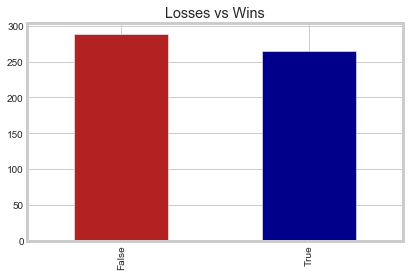

In [8]:
# Total Wins / losses
df_stats['win'].value_counts().plot(kind='bar', color = ['firebrick', 'darkblue'])
plt.title('Losses vs Wins')

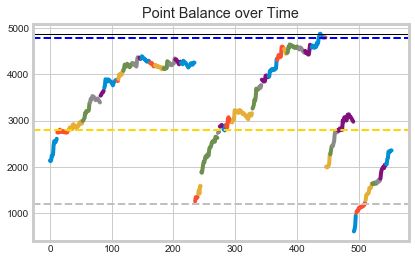

In [9]:
# This graph shows my balance of points over time, color denotes different days. 
# Horizontal lines mark where promotion to a new rank begins. Silver for Silver, Gold for Gold, Blue for Platinum

df_stats['point_balance'].groupby(df_stats['date']).plot()
plt.title('Point Balance over Time')


plt.axhline(y=1200, xmin=0, xmax=1, color = 'silver', ls='--', linewidth = 2)
plt.axhline(y=2800, xmin=0, xmax=1, color = 'gold', ls='--', linewidth = 2)
plt.axhline(y=4800, xmin=0, xmax=1, color = 'blue', ls='--', linewidth = 2)
plt.axhline(y=df_stats['point_balance'].max(), color= 'black', linewidth=1)

plt.show()

The large discontinuities of the graph are due to new seasons of the game beginning, knocking my rank down. The smaller discontinuities are due to missing some games.

In [10]:
# Averages across all games
df_stats[['point_won', 'net_point', 'squad_rank', 'win', 'kills', 'assists', 'damage']].mean().round(3)

point_won      35.088
net_point      14.294
squad_rank      9.549
win             0.478
kills           0.713
assists         0.284
damage        324.464
dtype: float64

In [11]:
wins_champ[['point_won', 'net_point', 'squad_rank', 'win', 'kills', 'assists', 'damage']].mean().round(3)

point_won     173.909
net_point     155.364
squad_rank      1.000
win             1.000
kills           2.727
assists         1.000
damage        895.273
dtype: float64

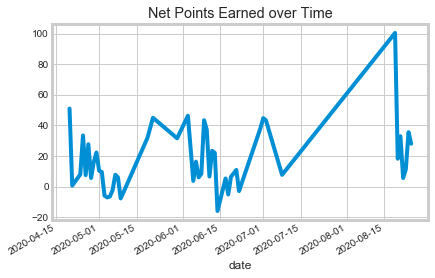

In [12]:
# Average net points earned over time
df_stats['net_point'].groupby(df_stats['date']).mean().plot()
plt.title('Net Points Earned over Time')
plt.show()

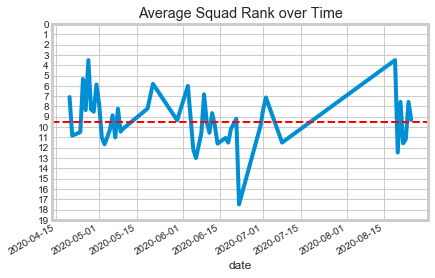

In [13]:
# average squad rank by day over time, red line is average rank overall
fig, ax = plt.subplots()
df_stats['squad_rank'].groupby(df_stats['date']).mean().plot()
plt.yticks(range(20))
plt.title('Average Squad Rank over Time')
plt.axhline(y=df_stats['squad_rank'].mean(), xmin=0, xmax=1, color = 'red', ls='--', linewidth = 2)
ax.invert_yaxis()
plt.show()

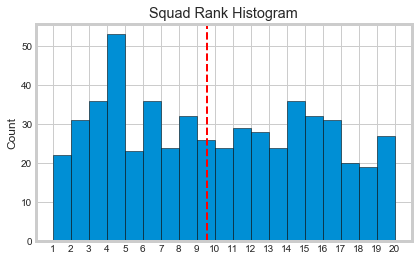

In [14]:
# histogram representing spread of what rank our games ended on. Dashed line is our average rank in all games.

bin_gen = [x for x in range(1,21)]
bin_labels = list(reversed(bin_gen))
bin_size = bin_gen
y_range = (df_stats['squad_rank'].value_counts().max())
y_range = [y for y in range(y_range + 2)]
plt.hist(df_stats['squad_rank'], bins=bin_size, ec='black')
plt.title('Squad Rank Histogram')
plt.xticks(bin_size)
plt.yticks()
plt.ylabel('Count')
plt.axvline(df_stats['squad_rank'].mean(), color='red', linestyle='dashed', linewidth=2)
df_stats['squad_rank'].value_counts()
plt.show()

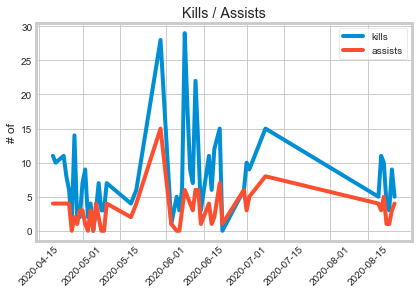

In [15]:
plt.plot(df_stats[['kills', 'assists']].groupby(df_stats['date']).sum())
plt.legend(['kills', 'assists'])
plt.title('Kills / Assists')
plt.ylabel('# of')
plt.xticks(rotation = 45)


plt.show()

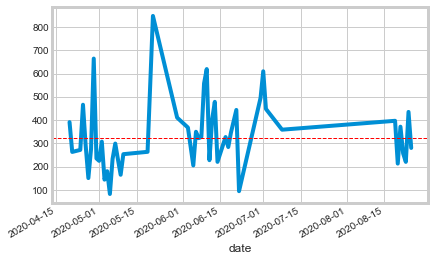

In [16]:
df_stats['damage'].groupby(df_stats['date']).mean().plot()
plt.axhline(df_stats['damage'].mean(), linewidth=1, linestyle='--', color='r')
plt.show()

Text(0.5, 1.0, 'Drop Location')

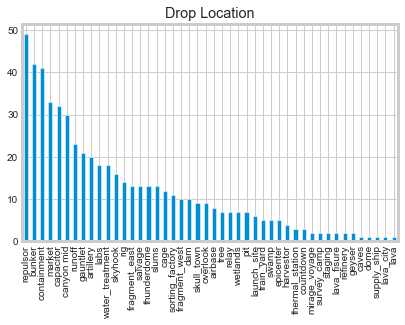

In [17]:
df_stats['drop_location'].value_counts().plot(kind='bar')
plt.title('Drop Location')

pathfinder    169
wraith         99
caustic        77
bloodhound     42
gibraltar      37
revenant       25
lifeline       18
octane         18
crypto         14
watson         13
rampart        13
mirage         12
bangalore       9
loba            8
Name: hero, dtype: int64

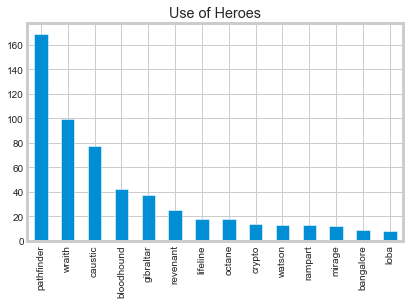

In [18]:
df_stats['hero'].value_counts().plot(kind='bar')
plt.title('Use of Heroes')
df_stats['hero'].value_counts()

In [19]:
# above we can see that there are 4 personal favorite heroes, in order of use: Pathfinder, Wraith, Caustic, and Bloodhound.

pathfinder    8
caustic       5
revenant      2
lifeline      2
watson        1
mirage        1
octane        1
crypto        1
bloodhound    1
Name: hero, dtype: int64

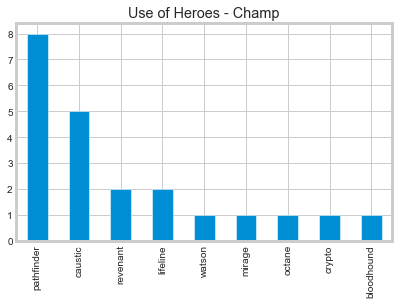

In [20]:
wins_champ['hero'].value_counts().plot(kind='bar')
plt.title('Use of Heroes - Champ')
wins_champ['hero'].value_counts()

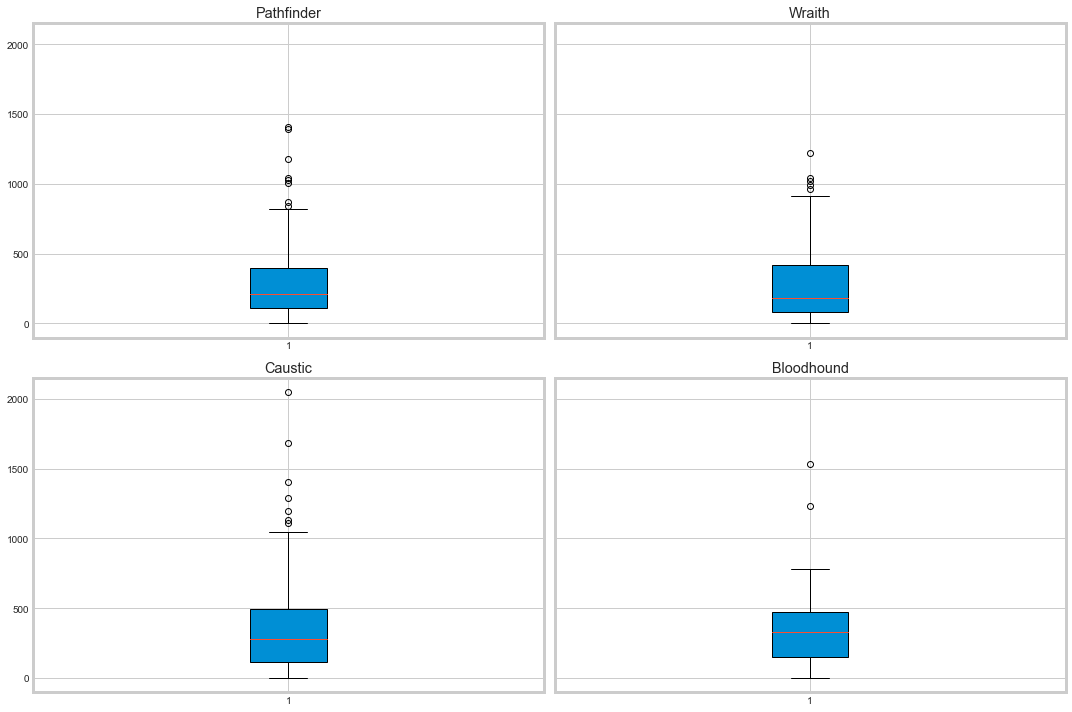

In [21]:
# Dataframes for main heros
df_pathfinder = df_stats[df_stats['hero']=='pathfinder']
df_wraith = df_stats[df_stats['hero']=='wraith']
df_caustic = df_stats[df_stats['hero']=='caustic']
df_bloodhound = df_stats[df_stats['hero']=='bloodhound']

fig, ax = plt.subplots(2, 2, figsize= (15, 10), sharey=True)

ax[0][0].boxplot(df_pathfinder['damage'], patch_artist=True)
ax[0][0].set_title('Pathfinder')
ax[0][0].set_label('')

ax[0][1].boxplot(df_wraith['damage'], patch_artist=True)
ax[0][1].set_title('Wraith')

ax[1][0].boxplot(df_caustic['damage'], patch_artist=True)
ax[1][0].set_title('Caustic')

ax[1][1].boxplot(df_bloodhound['damage'], patch_artist=True)
ax[1][1].set_title('Bloodhound')

plt.tight_layout()
plt.show()


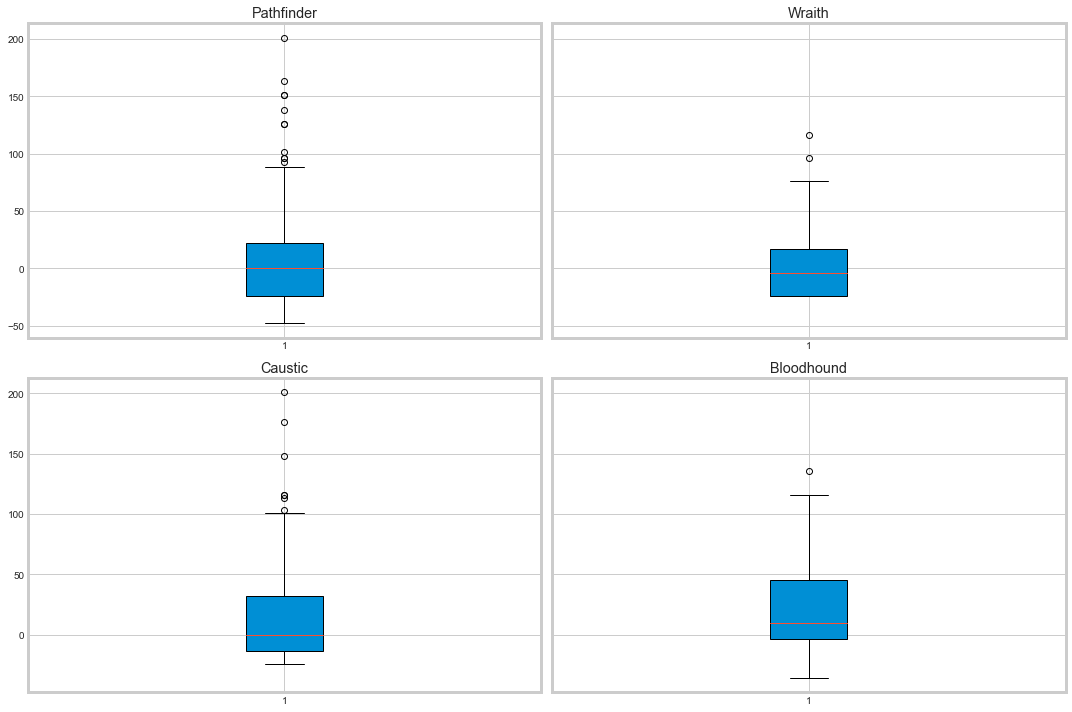

In [22]:
# broken up by Mains, this plot shows boxplots for net points.
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey='row')

ax[0][0].boxplot(df_pathfinder['net_point'], patch_artist=True)
ax[0][0].set_title('Pathfinder')


ax[0][1].boxplot(df_wraith['net_point'], patch_artist=True)
ax[0][1].set_title('Wraith')

ax[1][0].boxplot(df_caustic['net_point'], patch_artist=True)
ax[1][0].set_title('Caustic')

ax[1][1].boxplot(df_bloodhound['net_point'], patch_artist=True)
ax[1][1].set_title('Bloodhound')

plt.tight_layout()
plt.show()

In [23]:
df_stats['loadout_id'].value_counts().head(10)

6       35
7921    27
93      16
1157    15
26      14
6497    11
146     11
267     10
581     10
183     10
Name: loadout_id, dtype: int64

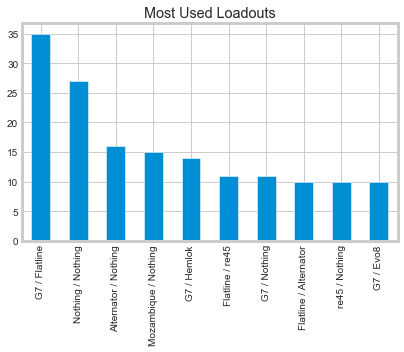

In [24]:
df_stats['loadout_id'].value_counts().head(10).plot(kind='bar')
plt.xticks(range(10), labels=['G7 / Flatline', 'Nothing / Nothing', 'Alternator / Nothing', 'Mozambique / Nothing', 'G7 / Hemlok',
           'Flatline / re45', 'G7 / Nothing', 'Flatline / Alternator', 're45 / Nothing', 'G7 / Evo8'])
plt.title('Most Used Loadouts')
plt.show()

This chart obviously looks a little odd given how often 'Nothing' shows up in it. The explanation I believe is that generally
when you only see one weapon, that tended to be a very quick game that ended before I could find and use another. So it would be very possible
to play and lose 5 or six games in the 20 odd minutes that one winning game takes.

It will make more sense when done using only winning games.


In [25]:
wins_points['loadout_id'].value_counts().head(10)

6      28
93     10
183     9
26      8
365     7
533     7
219     6
146     6
15      5
803     5
Name: loadout_id, dtype: int64

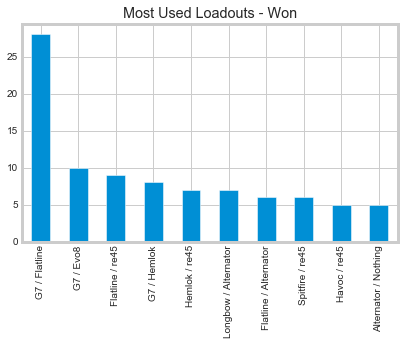

In [26]:
wins_points['loadout_id'].value_counts().head(10).plot(kind='bar')
plt.xticks(range(10), labels=['G7 / Flatline', 'G7 / Evo8', 'Flatline / re45', 'G7 / Hemlok', 'Hemlok / re45',
           'Longbow / Alternator', 'Flatline / Alternator', 'Spitfire / re45', 'Havoc / re45', 'Alternator / Nothing'])
plt.title('Most Used Loadouts - Won')
plt.show()


Looking at games where points were awarded, what do we see?
I have a very clear preferance towards the G7 and the Flatline (and if I can't find both, either of them). Maybe a little
harder to see is that I also have a secondary preference towards the re45 as an alternate weapon. Only one sniper rifle appears, and only one shotgun appears, of those, I
favor the one that fires quicker over the more powerful options.

The oddity here is the 'Alternator / Nothing' loadout. Generally any time you see a 'Nothing' show up, that's a lost game that is over quick.
So let's take a look at those rows.


In [27]:
wins_points[['net_point', 'kills', 'damage', 'time', 'squad_rank']].loc[wins_points['loadout_id'] == 1157]

,net_point,kills,damage,time,squad_rank
44,16,0,59,00:20:06,3
74,16,0,147,00:13:52,4
164,16,0,0,00:20:02,4
268,0,0,45,00:02:03,16


These games are indeed ones that ended early for me. The quirk is I still got points because my team survived long enough

# Weapon Statistics

These next graphs should be taken with a grain of salt. The data itself is very noisy due to the fact that the the stats of individual weapons
will be affected by what the other weapon is.

For example, because I use the G7/Flatline combo a lot, and those tend to be my highest damage games, it won't quite be easy to separate the stats for each individually since
damage is aggregated.

In [28]:
df_g7 = df_stats[df_stats['weapon1']=='g7']
df_flatline = df_stats[df_stats['weapon1']=='flatline']

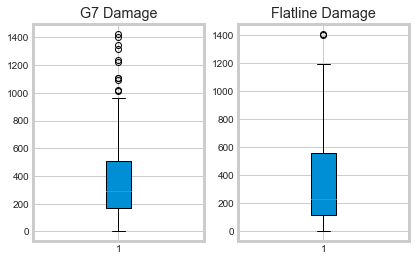

In [29]:
fig, ax = plt.subplots(1, 2)

ax[0].boxplot(df_g7['damage'], patch_artist=True)
ax[0].set_title('G7 Damage') 
ax[1].boxplot(df_flatline['damage'], patch_artist=True)
ax[1].set_title('Flatline Damage')
plt.show()